<a href="https://colab.research.google.com/github/EfrainHernandezCortes/EDP1/blob/main/Ejercicio26_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pylab import *

Se comienza graficando la condición incial.

In [12]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

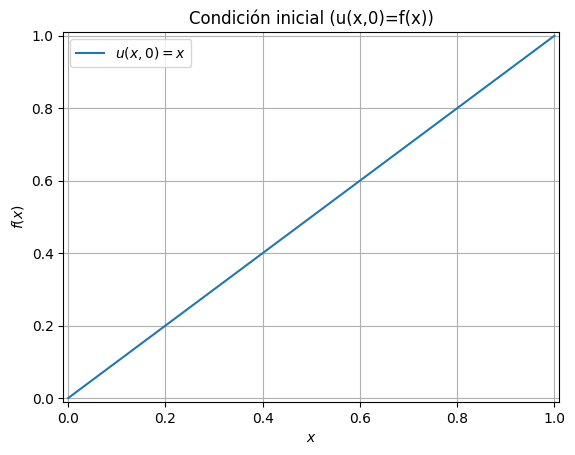

In [15]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

Se usa la serie de Fourier en cosenos para aproximar la condición inicial.

In [38]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 2*(((-1)**n-1)/(n*pi)**2)*cos(n*pi*x)
    return (1/2)+f

ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

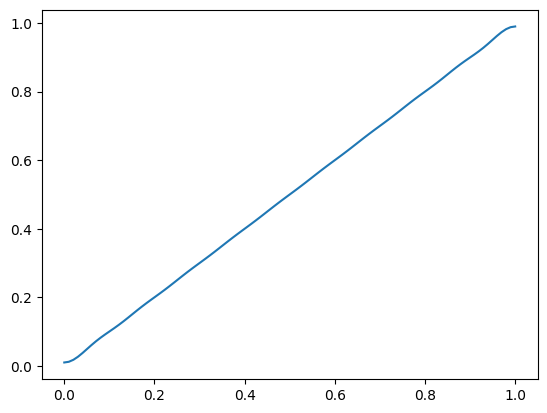

In [39]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,1.2]),grid(),legend()
show()

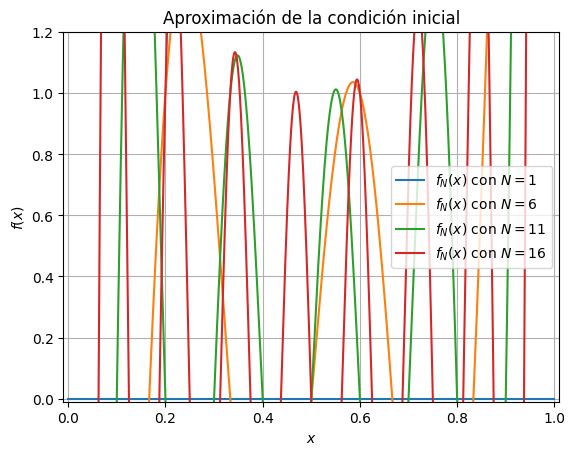

In [18]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

In [17]:

def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (2*(-1)**n-2)*cos(n*pi*x)
    return f/2

In [19]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

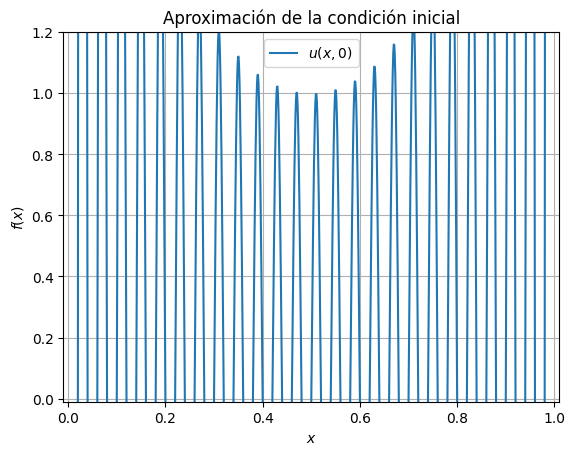

In [20]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

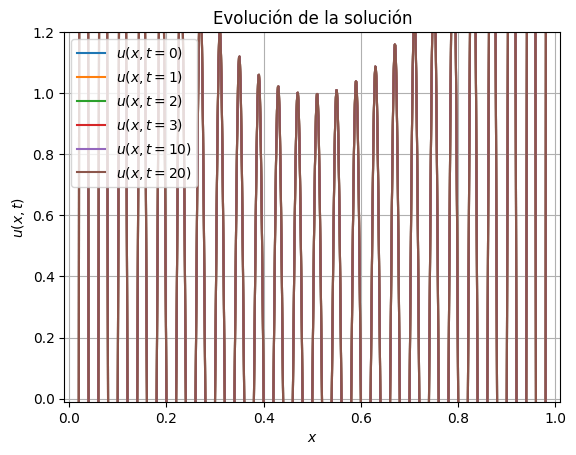

In [21]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

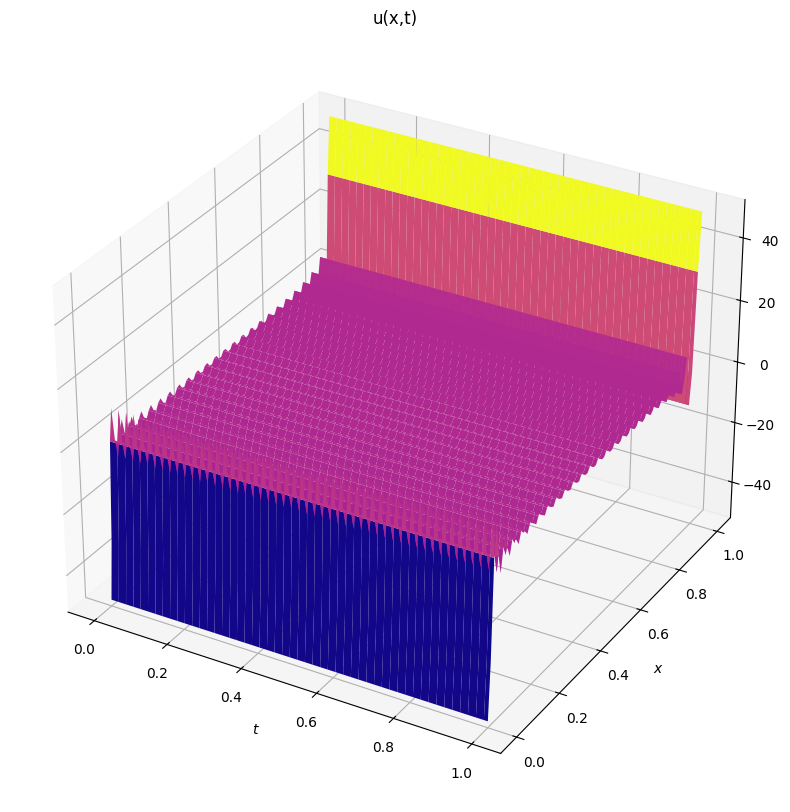

In [24]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma");